Installing the CDPL Python bindings
==============================

In [ ]:
pip install cdpkit

Processing Molecules
==================

The data structures for the in-memory representation of molecules as well as functionality for
their processing are located in package CDPL.Chem

In [1]:
import CDPL.Chem as Chem

First example: parsing a SMILES string

In [2]:
mol = Chem.parseSMILES('c1ccccc1')

mol

Display of the parsed molecule:

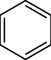

In [4]:
import CDPL.Vis

display(mol)

In [5]:
mol.removeAtom(0)

In [6]:
mol